In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
import joblib

import warnings
warnings.filterwarnings('ignore')

In [237]:
pip install imbalanced-learn

In [238]:
df = pd.read_csv('IT_customer_churn.csv')
df.sample(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1272,Male,0,Yes,Yes,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.45,86.05,No
3616,Female,1,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Credit card (automatic),87.30,6055.55,No
3122,Male,1,Yes,Yes,68,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.50,1193.55,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.2,Yes
3630,Female,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,85.5,Yes
4965,Female,0,No,No,6,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,47.95,305.1,Yes
3225,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85,No


In [239]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [240]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [241]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [242]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [243]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull().sum()

11

In [244]:
df1 = df[df['TotalCharges']!= ' ']

In [245]:
df1.shape

(7032, 20)

In [246]:
pd.to_numeric(df1.TotalCharges, errors='coerce').isnull().sum()

0

In [247]:
df1['TotalCharges'] = pd.to_numeric(df1.TotalCharges, errors='coerce')

In [248]:
df1.shape

(7032, 20)

In [249]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


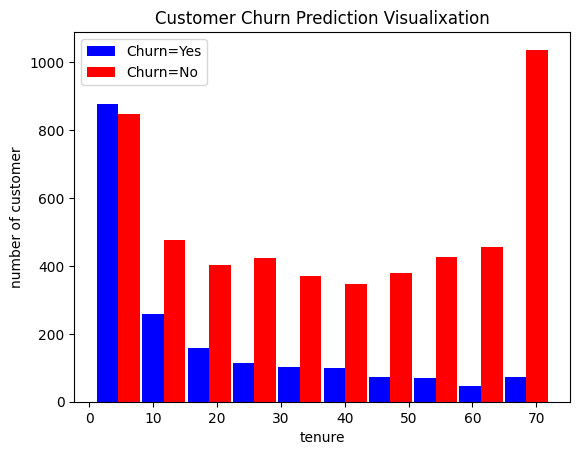

In [250]:
churn_tenure_yes = df1[df1['Churn']== 'Yes'].tenure
churn_tenure_no = df1[df1['Churn']== 'No'].tenure

plt.xlabel('tenure')
plt.ylabel('number of customer')
plt.title('Customer Churn Prediction Visualixation')

plt.hist([churn_tenure_yes, churn_tenure_no], rwidth=0.95, color=['blue','red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

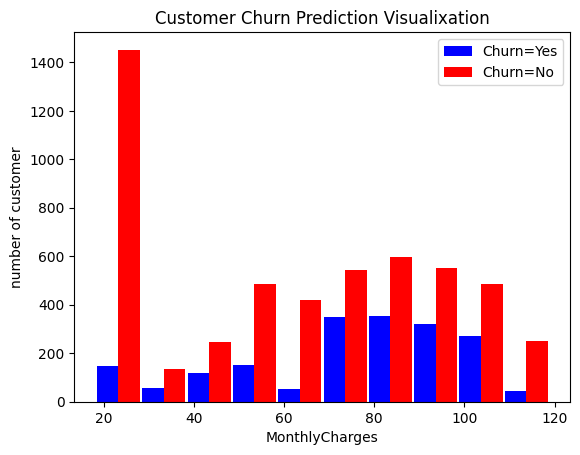

In [251]:
churn_MonthlyCharges_yes = df1[df1['Churn']== 'Yes'].MonthlyCharges
churn_MonthlyCharges_no = df1[df1['Churn']== 'No'].MonthlyCharges

plt.xlabel('MonthlyCharges')
plt.ylabel('number of customer')
plt.title('Customer Churn Prediction Visualixation')

plt.hist([churn_MonthlyCharges_yes, churn_MonthlyCharges_no], rwidth=0.95, color=['blue','red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [252]:
def uniqe_col_value(df):
  for col in df:
    if(df[col].dtypes == 'object'):
      print(f'{col}: {df[col].unique()}')

In [253]:
uniqe_col_value(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [254]:
df1.replace('No phone service','No', inplace=True)
df1.replace('No internet service','No', inplace=True)

In [255]:
uniqe_col_value(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [256]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                  'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes': 1,'No': 0}, inplace=True)

In [257]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [258]:
df1['gender'].replace({'Male': 1,'Female': 0}, inplace=True)

In [259]:
df1 = pd.get_dummies(df1,columns=['Contract','PaymentMethod','InternetService'],dtype=float)

In [260]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [261]:
X = df1.drop('Churn', axis='columns')
y = df1.Churn.astype(np.float32)

In [262]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

,count
Churn,
0.0,5163
1.0,5163


In [263]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=5, test_size=0.2, stratify=y_sm)

In [264]:
y_train.value_counts()

,count
Churn,
0.0,4130
1.0,4130


In [265]:
y_test.value_counts()

,count
Churn,
1.0,1033
0.0,1033


In [266]:
X_train.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
6580,0,0,1,0,0.943662,1,1,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6870,0,0,1,1,0.436620,0,0,1,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3034,1,1,1,0,1.000000,0,0,1,1,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6356,1,1,1,0,0.084507,1,1,0,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2756,0,1,0,0,0.126761,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8386,1,0,0,1,0.000000,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9940,0,1,0,0,0.058057,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7054,1,0,1,0,0.184944,1,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6494,1,0,1,1,0.971831,0,0,0,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2893,0,0,0,0,0.070423,0,0,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [275]:
def log_reg(X_train, y_train, X_test, y_test, weights):
  if weights == -1:
    model = LogisticRegression(random_state=5)
  else:
    model = LogisticRegression(class_weight={0:weights[0], 1:weights[1]}, random_state=5)

  model.fit(X_train,y_train)
  acc = model.score(X_test, y_test)
  print(f'Accuracy: {acc}')

  y_pred = model.predict(X_test)
  cl_report = classification_report(y_true=y_test, y_pred=y_pred)
  print(cl_report)

  return model

In [276]:
model = log_reg(X_train, y_train, X_test, y_test, -1)

Accuracy: 0.7918683446272992
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79      1033
         1.0       0.78      0.81      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



In [277]:
model_path = 'churn.joblib'
joblib.dump(model, model_path)

['churn.joblib']

In [278]:
new = joblib.load(model_path)

In [284]:
pred = new.predict(X_test)
pred

array([0., 1., 0., ..., 1., 1., 0.], dtype=float32)